In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv("data/prostate_TumorVSNormal_train.csv",header=None)
data2 = pd.read_csv("data/prostate_TumorVSNormal_test.csv", header=None)
data = data1.append(data2)
data_length = data.shape[1]
data_length

12601

In [3]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [4]:
data = pd.DataFrame(data.values,columns=column)
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12591,atribut12592,atribut12593,atribut12594,atribut12595,atribut12596,atribut12597,atribut12598,atribut12599,atribut12600
0,-9,1,1,15,-2,-3,4,8,-12,-12,...,5,3,21,15,1,0,14,-23,14,Tumor
1,-2,1,1,4,-2,-5,0,8,-5,-9,...,3,2,12,7,4,5,4,-10,25,Tumor
2,-6,17,6,29,4,-11,-8,10,-24,-32,...,-5,11,11,36,8,7,21,-82,10,Tumor
3,0,9,4,19,-10,-18,-18,5,-33,-31,...,-7,6,9,22,3,20,-7,-62,24,Tumor
4,-1,0,1,5,0,-4,1,6,-4,-9,...,6,1,140,10,3,8,8,-27,20,Tumor


In [5]:
data = data.rename(columns={'atribut12600': 'status'})
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12591,atribut12592,atribut12593,atribut12594,atribut12595,atribut12596,atribut12597,atribut12598,atribut12599,status
0,-9,1,1,15,-2,-3,4,8,-12,-12,...,5,3,21,15,1,0,14,-23,14,Tumor
1,-2,1,1,4,-2,-5,0,8,-5,-9,...,3,2,12,7,4,5,4,-10,25,Tumor
2,-6,17,6,29,4,-11,-8,10,-24,-32,...,-5,11,11,36,8,7,21,-82,10,Tumor
3,0,9,4,19,-10,-18,-18,5,-33,-31,...,-7,6,9,22,3,20,-7,-62,24,Tumor
4,-1,0,1,5,0,-4,1,6,-4,-9,...,6,1,140,10,3,8,8,-27,20,Tumor


In [6]:
data.loc[data['status'] == 'Tumor', ['status']] = 0
data.loc[data['status'] == 'Normal', ['status']] = 1
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12591,atribut12592,atribut12593,atribut12594,atribut12595,atribut12596,atribut12597,atribut12598,atribut12599,status
0,-9,1,1,15,-2,-3,4,8,-12,-12,...,5,3,21,15,1,0,14,-23,14,0
1,-2,1,1,4,-2,-5,0,8,-5,-9,...,3,2,12,7,4,5,4,-10,25,0
2,-6,17,6,29,4,-11,-8,10,-24,-32,...,-5,11,11,36,8,7,21,-82,10,0
3,0,9,4,19,-10,-18,-18,5,-33,-31,...,-7,6,9,22,3,20,-7,-62,24,0
4,-1,0,1,5,0,-4,1,6,-4,-9,...,6,1,140,10,3,8,8,-27,20,0


In [7]:
data = data.apply(pd.to_numeric)

In [8]:
data['status'].value_counts()

0    77
1    59
Name: status, dtype: int64

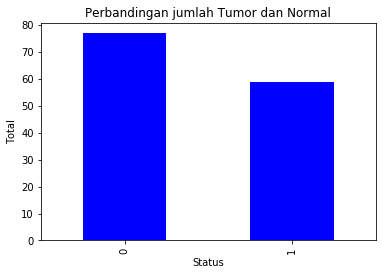

In [9]:
import matplotlib.pyplot as plt
data['status'].value_counts().plot(kind='bar', color="b")
plt.title("Perbandingan jumlah Tumor dan Normal")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

In [10]:
data.describe()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12591,atribut12592,atribut12593,atribut12594,atribut12595,atribut12596,atribut12597,atribut12598,atribut12599,status
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,...,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,-15.747794,7.140441,14.322794,26.102206,95.184559,80.761765,58.069118,283.598529,276.858824,311.495588,...,5.647794,12.356618,28.948529,38.378676,18.899265,-0.889706,-9.284559,-60.025735,65.708088,0.433824
std,23.579156,13.112089,27.804428,26.811743,195.349222,187.560985,124.541759,522.450262,571.721952,653.038374,...,36.305773,15.955715,59.173232,38.801274,28.963260,34.019313,74.971347,58.260981,94.417007,0.497434
min,-116.000000,-20.000000,-12.000000,-32.000000,-51.000000,-103.000000,-44.000000,-11.000000,-124.000000,-83.000000,...,-110.000000,-12.000000,-55.000000,-4.000000,-6.000000,-199.000000,-339.000000,-226.000000,-65.000000,0.000000
25%,-22.250000,0.000000,0.000000,5.000000,-5.000000,-14.250000,-3.250000,6.000000,-18.500000,-27.250000,...,-8.250000,2.000000,5.000000,7.000000,1.000000,-1.250000,-25.500000,-93.000000,12.750000,0.000000
50%,-6.000000,3.000000,1.000000,15.000000,-1.000000,-5.000000,0.000000,13.000000,-6.500000,-10.500000,...,4.000000,5.000000,14.000000,22.000000,5.000000,5.000000,0.500000,-38.500000,23.000000,0.000000
75%,-1.750000,11.250000,14.000000,44.500000,70.000000,39.500000,34.000000,174.000000,109.000000,113.500000,...,11.250000,21.000000,25.000000,66.750000,26.250000,12.000000,18.000000,-14.000000,75.000000,1.000000
max,10.000000,61.000000,134.000000,112.000000,787.000000,801.000000,655.000000,2017.000000,2285.000000,2604.000000,...,131.000000,71.000000,489.000000,149.000000,126.000000,97.000000,281.000000,58.000000,337.000000,1.000000


In [11]:
X = data.drop(['status'],axis=1)
y = data['status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=45)

In [13]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_ = scaler.fit_transform(X_train_)
    X_test_ = scaler.transform(X_test_)
    return X_train_,X_test_

In [14]:
X_train_, X_test_ = minmax_scaler(X_train,X_test)
X_train = pd.DataFrame(data=X_train_, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_, columns=X_test.columns)

In [15]:
# korelasi = data.corr().drop(['status'],axis=1).drop(['status'],axis=0)
# korelasi.columns

In [16]:
from sklearn.feature_selection import f_classif
f_score, f_p_value = f_classif(X,y)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)

F - score score    [4.58060971e-01 2.00132632e+00 6.08482578e+00 ... 8.49239343e+00
 3.49529817e-03 3.96960967e+00]
F - score p-value  [0.49969824 0.15948115 0.01489676 ... 0.00418066 0.95294377 0.04836049]


In [17]:
import random

In [18]:
def random_subset(s, n_features = 3, n_iter=10):
    listSubset = []
    for i in range(n_iter):
        listSubset.append(random.sample(list(s),n_features))
    return listSubset

In [19]:
def count_redundancy(cor):
    korr = []
    korr = cor.values
    np.fill_diagonal(korr,0)
    korr = np.concatenate(korr)
    korr = np.unique(korr)
    sum_kor = np.sum(korr)
    return sum_kor

In [20]:
def mrmr(X,y,n_features=3,n_iter=10):
    subset = random_subset(X.columns,n_features,n_iter)
    mrmr_list = []
    for i in subset:
        korelasi = X[i].corr()
        red = count_redundancy(korelasi)
        f_score, f_p_value = f_classif(X[i],y)
        rel = np.sum(f_score)
        mrmr_score = rel - ((1/len(subset))*red)
        mrmr_list.append((i,mrmr_score))
    return sorted(mrmr_list,key=lambda l:l[1],reverse=True)

In [21]:
taken_featuresTrain = mrmr(X_train,y_train,AttributeError10000,10)[0][0]
taken_featuresTrain

MemoryError: Unable to allocate array with shape (100000000,) and data type float64

In [ ]:
X_train_mrmr = X_train[taken_featuresTrain].copy()

In [80]:
taken_featuresTest = mrmr(X_test,y_test,5000,10)[0][0]
taken_featuresTest

['atribut8686',
 'atribut4593',
 'atribut9108',
 'atribut10990',
 'atribut6032',
 'atribut6184',
 'atribut1775',
 'atribut10409',
 'atribut4017',
 'atribut5796',
 'atribut1309',
 'atribut4948',
 'atribut10864',
 'atribut3823',
 'atribut10356',
 'atribut5204',
 'atribut1128',
 'atribut6370',
 'atribut3162',
 'atribut7284',
 'atribut6336',
 'atribut9521',
 'atribut10197',
 'atribut2944',
 'atribut802',
 'atribut8938',
 'atribut11739',
 'atribut10851',
 'atribut5152',
 'atribut7002',
 'atribut8466',
 'atribut10088',
 'atribut5563',
 'atribut1106',
 'atribut8890',
 'atribut2675',
 'atribut9610',
 'atribut7806',
 'atribut7480',
 'atribut11591',
 'atribut2129',
 'atribut6179',
 'atribut10705',
 'atribut10789',
 'atribut10664',
 'atribut5230',
 'atribut1959',
 'atribut11410',
 'atribut184',
 'atribut9534',
 'atribut12397',
 'atribut4498',
 'atribut6963',
 'atribut9508',
 'atribut2725',
 'atribut8334',
 'atribut10158',
 'atribut4371',
 'atribut5545',
 'atribut10234',
 'atribut4170',
 'atribut1

In [81]:
X_test_mrmr = X_test[taken_featuresTest].copy()

In [82]:
model_rfg = RandomForestClassifier()

In [83]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'log2'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }

In [84]:
random_search = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1)

# Fit the random search model
random_search.fit(X_train_mrmr, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [85]:
print("Best Params : ",random_search.best_params_)
print()
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'bootstrap': False}

0.898 (+/-0.159) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.852 (+/-0.172) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.880 (+/-0.183) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.926 (+/-0.094) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
0.907 (+/-0.159) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.861 (+/-0.198) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.898 (+/-0.139) for {'n_estimators': 400, 'min_samples_split': 2, '

In [86]:
random_search.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'bootstrap': False}

In [87]:
grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto'],
               'min_samples_split': [2],
               'min_samples_leaf': [4],
               'bootstrap': [False]
                     }

In [88]:
grid_search = GridSearchCV(estimator=model_rfg,
                                   param_grid=grid_params,
                                   cv=3, 
                                   verbose=1, 
                                   n_jobs = -1)

grid_search.fit(X_train_mrmr, y_train)
print("Best Params : ",grid_search.best_params_)
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    9.6s finished


Best Params :  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}

0.917 (+/-0.120) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
0.935 (+/-0.114) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}
0.926 (+/-0.069) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 600}
0.917 (+/-0.120) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 800}
0.935 (+/-0.114) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000}


In [89]:
classifier = grid_search.best_estimator_

In [ ]:
classifier.fit(X_train_mrmr, y_train)

In [ ]:
prediksi = classifier.predict(X_test_mrmr)
prediksi

In [ ]:
pd.DataFrame({
    "status" : y_test,
    "status predicted" : prediksi
})

In [ ]:
accuracy_score(y_test,prediksi)

In [ ]:
print(classification_report(y_test, prediksi))

In [ ]:
aux_df = data[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test, prediksi)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [ ]:
confusion_matrix(y_test,prediksi)